<center><h1>Nabar_Deven_HW7</h1></center>

Name: Deven Nabar
<br>
Github Username: DevenNabar
<br>
USC ID: 7229446568

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer,hamming_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,accuracy_score
from sklearn.preprocessing import StandardScaler
import operator
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
df=pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [3]:
X=df.iloc[:,0:22].values
Y=df.iloc[:,22:25].values

In [4]:
featureNames = []
for i in range(1, 23):
    if i<10:
        featureName = 'MFCCs_ ' + str(i)
    else:
        featureName = 'MFCCs_' + str(i)
    featureNames.append(featureName)
        
labels = ['Family', 'Genus', 'Species']
familyClasses = set()
genusClasses = set()
speciesClasses = set()
dataX = df[featureNames]
dataY = df[labels]

In [5]:
label_encoder = LabelEncoder()
Y[:,0] = label_encoder.fit_transform(Y[:,0])
print(Y)
label_encoder1 = LabelEncoder()
Y[:,1] = label_encoder1.fit_transform(Y[:,1])
print(Y)
label_encoder2 = LabelEncoder()
Y[:,2] = label_encoder2.fit_transform(Y[:,2])
print(Y)
Y=Y.astype('int')

[[3 'Adenomera' 'AdenomeraAndre']
 [3 'Adenomera' 'AdenomeraAndre']
 [3 'Adenomera' 'AdenomeraAndre']
 ...
 [2 'Scinax' 'ScinaxRuber']
 [2 'Scinax' 'ScinaxRuber']
 [2 'Scinax' 'ScinaxRuber']]
[[3 0 'AdenomeraAndre']
 [3 0 'AdenomeraAndre']
 [3 0 'AdenomeraAndre']
 ...
 [2 7 'ScinaxRuber']
 [2 7 'ScinaxRuber']
 [2 7 'ScinaxRuber']]
[[3 0 0]
 [3 0 0]
 [3 0 0]
 ...
 [2 7 9]
 [2 7 9]
 [2 7 9]]


In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,train_size=0.7)

### (b) Train a classifier for each label

#### (i) Research

In [7]:
def emr(y_true, y_pred):
    n = len(y_true)
    row_indicators = np.all(y_true == y_pred, axis = 1) 
    exact_match_count = np.sum(row_indicators)
    return exact_match_count/n

In [8]:
op=[]
def hamming_loss(y_true, y_pred):
    for i in range(len(y_pred)):
        t=np.logical_xor(list(y_true[i,:]),list(y_pred[i,:]))
        op.append(t)
    hl_num = np.sum(op)
    hl_den = np.prod(y_true.shape)
    
    return hl_num/hl_den

#### (ii) Train a SVM for each of the labels

In [9]:
subclf = SVC(kernel='rbf')
clf = OneVsRestClassifier(estimator=subclf)

parameters = {
    'estimator__C': [0.1, 1,10],
    'estimator__gamma': [0.1, 1,10]
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search.fit(x_train, y_train[:,0])
print(grid_search.best_params_)

{'estimator__C': 10, 'estimator__gamma': 1}


In [10]:
subclf = SVC(kernel='rbf')
clf = OneVsRestClassifier(estimator=subclf)

parameters = {
    'estimator__C': [0.1, 1,10],
    'estimator__gamma': [0.1, 1,10]
}
#my_custom_scorer = make_scorer(emr, greater_is_better=False)
grid_search1 = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search1.fit(x_train, y_train[:,1])
print(grid_search1.best_params_)

{'estimator__C': 10, 'estimator__gamma': 1}


In [11]:
subclf = SVC(kernel='rbf')
clf = OneVsRestClassifier(estimator=subclf)

parameters = {
    'estimator__C': [0.1, 1,10],
    'estimator__gamma': [0.1, 1,10]
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search2 = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search2.fit(x_train, y_train[:,2])
print(grid_search2.best_params_)

{'estimator__C': 10, 'estimator__gamma': 1}


In [12]:
q=pd.DataFrame(grid_search.predict(x_test))
q1=pd.DataFrame(grid_search1.predict(x_test))
q2=pd.DataFrame(grid_search2.predict(x_test))
fin=pd.concat([q,q1,q2],axis=1)
fin1=fin.to_numpy()
print(fin1)

[[2 7 9]
 [2 2 3]
 [3 0 1]
 ...
 [2 3 4]
 [1 1 2]
 [3 0 1]]


In [13]:
print("hamming loss - ",hamming_loss(y_test,fin1))

hamming loss -  0.0033966342442488806


In [14]:
print("Exact Match score - ",emr(y_test,fin1))

Exact Match score -  0.9870310328855951


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [15]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)
x_train_sc

array([[ 0.14582475, -1.97954782, -0.04800417, ...,  0.57359681,
        -0.86100064, -0.82735849],
       [ 0.14582475, -0.46046314, -0.25253697, ..., -0.08963439,
         1.29652259,  0.72716631],
       [ 0.14582475,  0.99272344,  0.39002731, ...,  0.25087172,
        -0.58687473, -0.12227314],
       ...,
       [-4.68228099,  3.11498554, -0.02171412, ...,  0.52644423,
        -0.02757946, -0.48520916],
       [ 0.14582475,  0.2646227 ,  0.46200719, ..., -0.29845024,
         0.81025191,  0.62737257],
       [ 0.14582475, -0.3951899 ,  0.80565755, ..., -1.08824547,
        -0.49139588,  0.27316067]])

In [16]:
subclf = LinearSVC(penalty='l1',multi_class='ovr',dual=False)
#clf = OneVsRestClassifier(estimator=subclf)

parameters = {
    'C': [0.1, 1,10],
   
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search = GridSearchCV(
    estimator=subclf,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search.fit(x_train_sc, y_train[:,0])
print(grid_search.best_params_)

{'C': 1}


In [17]:
subclf = LinearSVC(penalty='l1',multi_class='ovr',dual=False)
#clf = OneVsRestClassifier(estimator=subclf)

parameters = {
    'C': [0.1, 1,10],
   
}
#my_custom_scorer = make_scorer(emr, greater_is_better=False)
grid_search1 = GridSearchCV(
    estimator=subclf,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search1.fit(x_train_sc, y_train[:,1])
print(grid_search1.best_params_)

{'C': 10}


In [18]:
subclf = LinearSVC(penalty='l1',multi_class='ovr',dual=False)
#clf = OneVsRestClassifier(estimator=subclf)

parameters = {
    'C': [0.1, 1,10],
   
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search2 = GridSearchCV(
    estimator=subclf,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search2.fit(x_train_sc, y_train[:,2])
print(grid_search2.best_params_)

{'C': 10}


In [19]:
q=pd.DataFrame(grid_search.predict(x_test))
q1=pd.DataFrame(grid_search1.predict(x_test))
q2=pd.DataFrame(grid_search2.predict(x_test))
fin=pd.concat([q,q1,q2],axis=1)
fin2=fin.to_numpy()
print(fin2)

[[3 0 1]
 [3 0 3]
 [3 0 1]
 ...
 [3 0 5]
 [3 0 3]
 [3 0 1]]


In [20]:
print("hamming loss - ",hamming_loss(y_test,fin2))

hamming loss -  0.17307395399104525


In [21]:
print("Exact match score - ",emr(y_test,fin2))

Exact match score -  0.4789254284390922


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [22]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=0)],
                                ['estimator', LinearSVC(penalty='l1', multi_class='ovr',dual=False)]])
parameters = {
    'estimator__C': [0.1, 1,10],
   
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search.fit(x_train_sc, y_train[:,0])
print(grid_search.best_params_)

{'estimator__C': 1}


In [23]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=0)],
                                ['estimator', LinearSVC(penalty='l1', multi_class='ovr',dual=False)]])
parameters = {
    'estimator__C': [0.1, 1,10],
   
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search1 = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search1.fit(x_train_sc, y_train[:,1])
print(grid_search1.best_params_)

{'estimator__C': 1}


In [24]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=0)],
                                ['estimator', LinearSVC(penalty='l1', multi_class='ovr',dual=False)]])
parameters = {
    'estimator__C': [0.1, 1,10],
   
}
#my_custom_scorer = make_scorer(hamming_loss, greater_is_better=False)
grid_search2 = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv = 10,
    #scoring=my_custom_scorer
)
grid_search2.fit(x_train_sc, y_train[:,2])
print(grid_search2.best_params_)

{'estimator__C': 0.1}


In [25]:
q=pd.DataFrame(grid_search.predict(x_test))
q1=pd.DataFrame(grid_search1.predict(x_test))
q2=pd.DataFrame(grid_search2.predict(x_test))
fin=pd.concat([q,q1,q2],axis=1)
fin3=fin.to_numpy()
print(fin3)

[[3 2 5]
 [3 2 5]
 [3 2 1]
 ...
 [3 3 5]
 [3 2 5]
 [3 2 1]]


In [26]:
print("hamming loss - ",hamming_loss(y_test,fin3))

hamming loss -  0.4015748031496063


In [27]:
print("Exact match score - ",emr(y_test,fin3))

Exact match score -  0.009726725335803613


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [28]:
iterativeBestCluster = {}
for iteration in range(1, 51):
    silhouetteScoreDict = {}
    for k in range(2, 51):
        kMeansModel = KMeans(n_clusters=k)
        kMeansModel = kMeansModel.fit(dataX)
        clusterIndex = kMeansModel.labels_
        silhouetteScore = silhouette_score(dataX, clusterIndex)
        silhouetteScoreDict[k] = silhouetteScore

    sortedScores = sorted(silhouetteScoreDict.items(), key=operator.itemgetter(1), reverse=True)
    bestCluster = sortedScores[0][0]
    iterativeBestCluster[iteration] = bestCluster

In [29]:
tableData = []
for iteration in range(1, 51):
    row = []
    row.append('Iteration ' + str(iteration))
    row.append(iterativeBestCluster[iteration])
    tableData.append(row)

In [30]:
dfffff = pd.DataFrame(tableData, columns = ['Iteration', 'Number of Optimal Clusters'])
dfffff

,Iteration,Number of Optimal Clusters
0,Iteration 1,4
1,Iteration 2,4
2,Iteration 3,4
3,Iteration 4,4
4,Iteration 5,4
5,Iteration 6,4
6,Iteration 7,4
7,Iteration 8,4
8,Iteration 9,4
9,Iteration 10,4


In [31]:
iterationClusterIndex = {}
for iteration in range(1, 51):
    finalKMeansModel = KMeans(n_clusters=bestCluster)
    finalKMeansModel = finalKMeansModel.fit(dataX)
    clusterIndex = finalKMeansModel.labels_
    iterationClusterIndex[iteration] = clusterIndex

### (b) Determine which family is the majority

In [32]:
tableData = []
for iteration in range(1, 51):
    bestCluster = iterativeBestCluster[iteration]
    clusterIndex = iterationClusterIndex[iteration]
    clusterLabel = []
    for i in range(0, bestCluster):
        family = {}
        genus = {}
        species = {}
        for j in range(0, len(dataY)):
            if clusterIndex[j]==i:
                familyClass = dataY['Family'][j]
                if familyClass in family.keys():
                    family[familyClass] += 1
                else:
                    family[familyClass] = 1

                genusClass = dataY['Genus'][j]
                if genusClass in genus.keys():
                    genus[genusClass] += 1
                else:
                    genus[genusClass] = 1

                speciesClass = dataY['Species'][j]
                if speciesClass in species.keys():
                    species[speciesClass] += 1
                else:
                    species[speciesClass] = 1

        sortedFamily = sorted(family.items(), key=operator.itemgetter(1), reverse=True)
        sortedGenus = sorted(genus.items(), key=operator.itemgetter(1), reverse=True)
        sortedSpecies = sorted(species.items(), key=operator.itemgetter(1), reverse=True)

        familyLabel = sortedFamily[0][0]
        genusLabel = sortedGenus[0][0]
        speciesLabel = sortedSpecies[0][0]

        label = {}
        label['Family'] = familyLabel
        label['Genus'] = genusLabel
        label['Species'] = speciesLabel
        clusterLabel.append(label)
  
    for i in range(0, bestCluster):
        row = []
        row.append('Iteration ' + str(iteration))
        row.append('Cluster ' + str(i+1))
        row.append(clusterLabel[i]['Family'])
        row.append(clusterLabel[i]['Genus'])
        row.append(clusterLabel[i]['Species'])
        tableData.append(row)

In [33]:
dffff = pd.DataFrame(tableData, columns = ['Iteration', 'Cluster','Family','Genus','Species'])
dffff

,Iteration,Cluster,Family,Genus,Species
0,Iteration 1,Cluster 1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Iteration 1,Cluster 2,Leptodactylidae,Adenomera,AdenomeraAndre
2,Iteration 1,Cluster 3,Hylidae,Hypsiboas,HypsiboasCordobae
3,Iteration 1,Cluster 4,Hylidae,Hypsiboas,HypsiboasCordobae
4,Iteration 2,Cluster 1,Hylidae,Hypsiboas,HypsiboasCinerascens
...,...,...,...,...,...
195,Iteration 49,Cluster 4,Hylidae,Hypsiboas,HypsiboasCordobae
196,Iteration 50,Cluster 1,Dendrobatidae,Ameerega,Ameeregatrivittata
197,Iteration 50,Cluster 2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
198,Iteration 50,Cluster 3,Hylidae,Hypsiboas,HypsiboasCinerascens


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [34]:
from sklearn.metrics import hamming_loss
hamming_los=[]
hamming_dist=[]
hamming_score=[]
exact_match_score=[]
avgHammingLoss = []
avgHammingScore = []
for iteration in range(1, 51):
    clusterIndex = iterationClusterIndex[iteration]
    predictedFamilyY = []
    predictedGenusY = []
    predictedSpeciesY = []
    for i in range(0, len(dataX)):
        clusterName = clusterIndex[i]
        label = clusterLabel[clusterName]
        predFamilyLabel = label['Family']
        predGenusLabel = label['Genus']
        predSpeciesLabel = label['Species']

        predictedFamilyY.append(predFamilyLabel)
        predictedGenusY.append(predGenusLabel)
        predictedSpeciesY.append(predSpeciesLabel)

    actualFamilyLabel = np.array(dataY['Family'])
    actualGenusLabel = np.array(dataY['Genus'])
    actualSpeciesLabel = np.array(dataY['Species'])

    predictedFamilyY = np.array(predictedFamilyY)
    predictedGenusY = np.array(predictedGenusY)
    predictedSpeciesY = np.array(predictedSpeciesY)

    rt2=np.stack((actualFamilyLabel,actualGenusLabel,actualSpeciesLabel),axis=1)
    rt3=np.stack((predictedFamilyY,predictedGenusY,predictedSpeciesY),axis=1)
    
    hal=0
    for j in range(len(rt2)):
        hal=hal+hamming_loss(rt2[j], rt3[j])

    hal=hal/len(rt2)

    acc=0
    for j in range(len(rt2)):
         if np.array_equal(rt2[j], rt3[j]):
                acc=acc+1

    acc=acc/len(rt2)

    had=0
    for j in range(len(rt2)):
         had=had+hamming_loss(rt2[j], rt3[j])*3

    had=had/len(rt2)

    hamming_los.append(hal)
    hamming_dist.append(had)
    hamming_score.append(1-hal)
    exact_match_score.append(acc)

In [35]:
tableData1 = []
for iteration in range(1, 51):
    row = []
    row.append('Iteration ' + str(iteration))
    row.append(hamming_los[iteration-1])
    row.append(hamming_dist[iteration-1])
    row.append(hamming_score[iteration-1])
    tableData1.append(row)

In [36]:
dff = pd.DataFrame(tableData1, columns = ['Iteration', 'Hamming Loss','Hamming Distance','Hamming Score'])
dff

,Iteration,Hamming Loss,Hamming Distance,Hamming Score
0,Iteration 1,0.771323,2.313968,0.228677
1,Iteration 2,0.354644,1.063933,0.645356
2,Iteration 3,0.847209,2.541626,0.152791
3,Iteration 4,0.869076,2.607227,0.130924
4,Iteration 5,0.400834,1.202502,0.599166
5,Iteration 6,0.445124,1.335372,0.554876
6,Iteration 7,0.320361,0.961084,0.679639
7,Iteration 8,0.745888,2.237665,0.254112
8,Iteration 9,0.886171,2.658513,0.113829
9,Iteration 10,0.445124,1.335372,0.554876


In [37]:
meanHammingLoss = statistics.mean(hamming_los)
meanHammingLoss = round(meanHammingLoss, 3)
stdHammingLoss = statistics.stdev(hamming_los)
stdHammingLoss = round(stdHammingLoss, 3)
meanHammingDistance = statistics.mean(hamming_dist)
meanHammingDistance = round(meanHammingDistance, 3)
stdHammingDistance = statistics.stdev(hamming_dist)
stdHammingDistance = round(stdHammingDistance, 3)
meanHammingScore = statistics.mean(hamming_score)
meanHammingScore = round(meanHammingScore,3)
stdHammingScore = statistics.stdev(hamming_score)
stdHammingScore = round(stdHammingScore,3)

In [38]:
tableData2 = []
row = []
row.append('Average')
row.append(meanHammingLoss)
row.append(meanHammingDistance)
row.append(meanHammingScore)
tableData2.append(row)
row = []
row.append('Standard Deviation')
row.append(stdHammingLoss)
row.append(stdHammingDistance)
row.append(stdHammingScore)
tableData2.append(row)

In [39]:
dfff = pd.DataFrame(tableData2, columns = ['Measure', 'Hamming Loss','Hamming Distance','Hamming Score'])
dfff

,Measure,Hamming Loss,Hamming Distance,Hamming Score
0,Average,0.560,1.679,0.440
1,Standard Deviation,0.251,0.754,0.251


## 3. ISLR 12.6.2

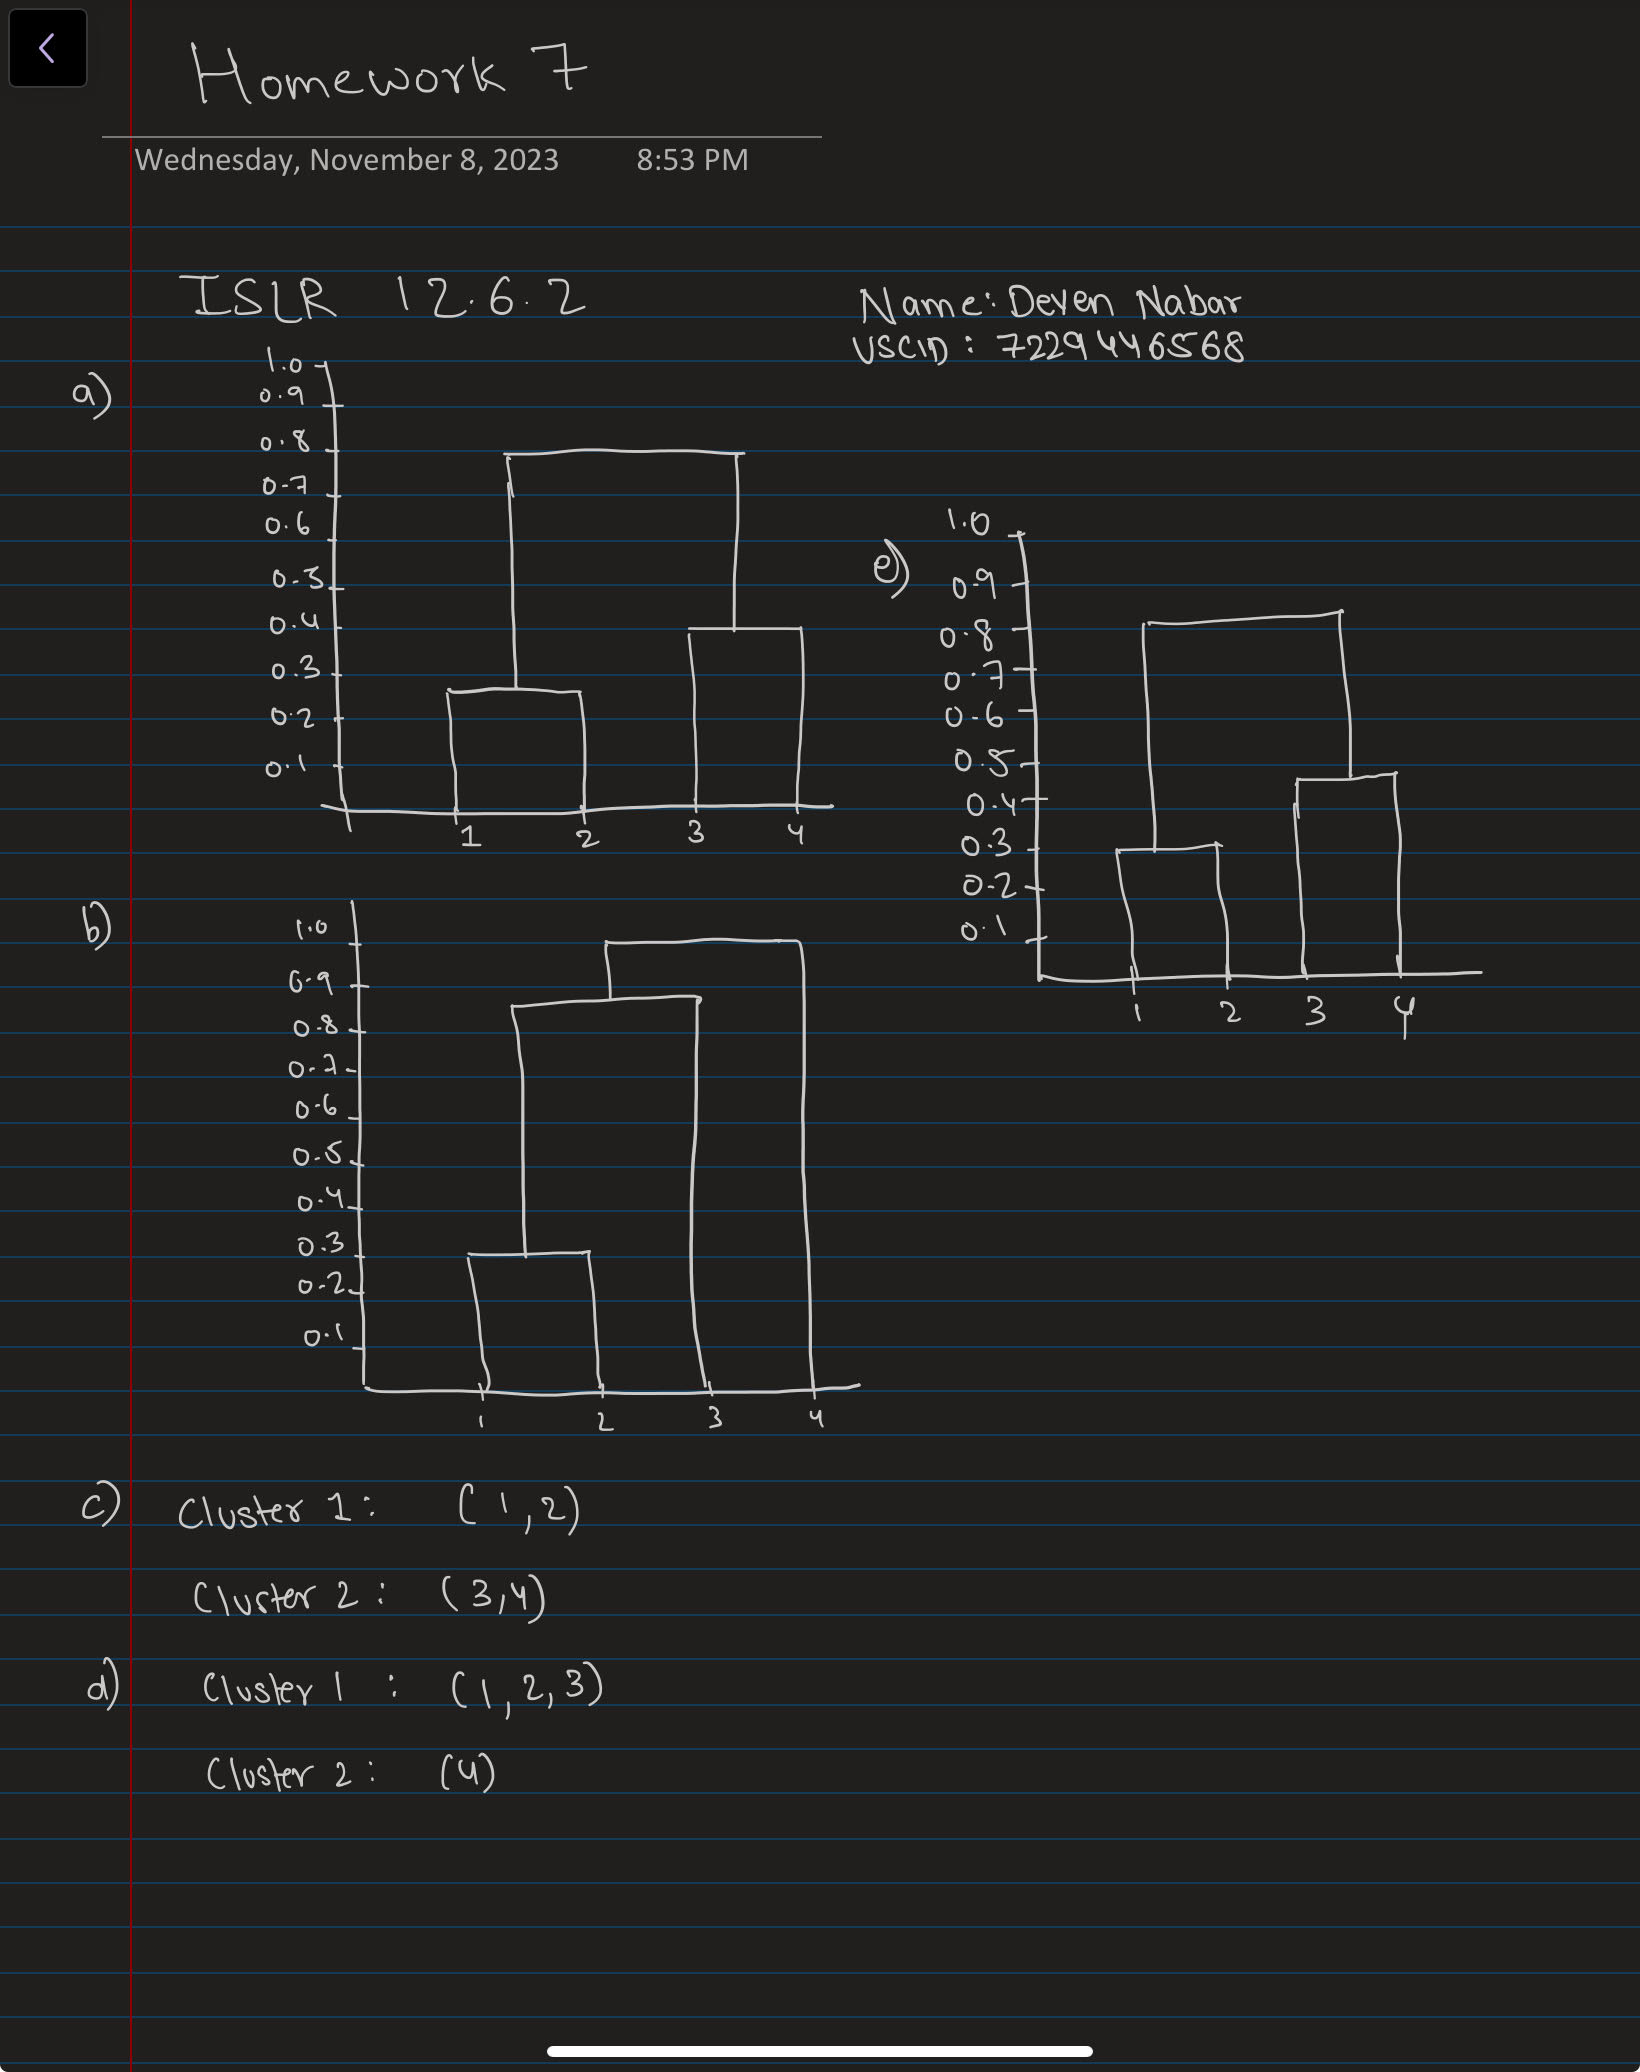